<a href="https://colab.research.google.com/github/mding010705/CSC311-ML-Challenge/blob/main/CSC311_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/mding010705/CSC311-ML-Challenge/main/modeling/clean_results.csv"

# Download the CSV file
response = requests.get(url)
if response.status_code == 200:
    with open("clean_results.csv", "wb") as file:
        file.write(response.content)
    print("Download complete.")

    # Read the CSV into a pandas DataFrame
    df = pd.read_csv("clean_results.csv")
    print(df.head())
else:
    print("Failed to download the file. Status code:", response.status_code)

Download complete.
   Unnamed: 0      id  food_complexity  num_ingredients  \
0           0  716549                3              6.0   
1           1  715742                4              2.0   
2           2  727333                3              5.0   
3           3  606874                4              6.5   
4           4  505318                2              3.0   

                                     serving_setting  expected_cost  \
0         Week day lunch,At a party,Late night snack            5.0   
1         Week day lunch,At a party,Late night snack            5.0   
2  Week day lunch,Week day dinner,Weekend lunch,W...           10.0   
3  Week day lunch,Week day dinner,Weekend lunch,W...            3.0   
4  Week day lunch,Week day dinner,Weekend lunch,W...            5.0   

                       related_movie paired_drink           associated_people  \
0  Cloudy with a Chance of Meatballs         coke                     Friends   
1                 american young boy 

In [31]:
# Adjust serving setting to several columns
serving_settings = ['Week day lunch','Week day dinner','Weekend lunch','Weekend dinner','At a party','Late night snack']
column_names = {'Week day lunch': 'serving_setting.weekday_lunch','Week day dinner': 'serving_setting.weekday_dinner',
                'Weekend lunch': 'serving_setting.weekend_lunch','Weekend dinner': 'serving_setting.weekend_dinner',
                'At a party': 'serving_setting.party','Late night snack': 'serving_setting.night_snack'}

for idx, row in df.iterrows():
    for serving_setting in serving_settings:
      if serving_setting in row['serving_setting']:
        df.loc[idx, column_names[serving_setting]] = 1
      else:
        df.loc[idx, column_names[serving_setting]] = 0

# Adjust associated people to indicator columns
associated_peoples = ['Parents', 'Siblings', 'Friends', 'Strangers', 'Teachers']
column_names = {'Parents': 'associated_people.parents','Siblings': 'associated_people.siblings',
                'Friends': 'associated_people.friends','Strangers': 'associated_people.stangers',
                'Teachers': 'associated_people.teachers'}

for idx, row in df.iterrows():
    for associated_people in associated_peoples:
      if isinstance(row['associated_people'], str) and associated_people in row['associated_people']:
        df.loc[idx, column_names[associated_people]] = 1
      else:
        df.loc[idx, column_names[associated_people]] = 0

# Drop modified columns
df = df.drop(columns=['serving_setting', 'associated_people'])

In [32]:
df.head()

,Unnamed: 0,id,food_complexity,num_ingredients,expected_cost,related_movie,paired_drink,hot_sauce_level,Label,serving_setting.weekday_lunch,serving_setting.weekday_dinner,serving_setting.weekend_lunch,serving_setting.weekend_dinner,serving_setting.party,serving_setting.night_snack,associated_people.parents,associated_people.siblings,associated_people.friends,associated_people.stangers,associated_people.teachers
0,0,716549,3,6.0,5.0,Cloudy with a Chance of Meatballs,coke,A little (mild),Pizza,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,715742,4,2.0,5.0,american young boy,coke,none,Pizza,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,2,727333,3,5.0,10.0,Gundam I: The Live-Action Movie,cola,A moderate amount (medium),Pizza,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,606874,4,6.5,3.0,Mamma Mia!,soda,I will have some of this food item with my hot...,Pizza,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
4,4,505318,2,3.0,5.0,Cloudy with a Chance of Meatballs,soda,A little (mild),Pizza,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [33]:
df_pizza = df[df['Label'] == 'Pizza']
df_shawrma = df[df['Label'] == 'Shawarma']
df_sushi = df[df['Label'] == 'Sushi']

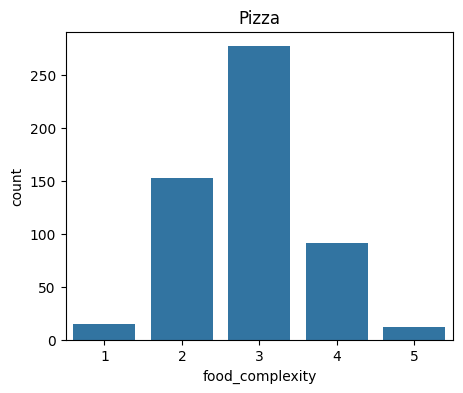

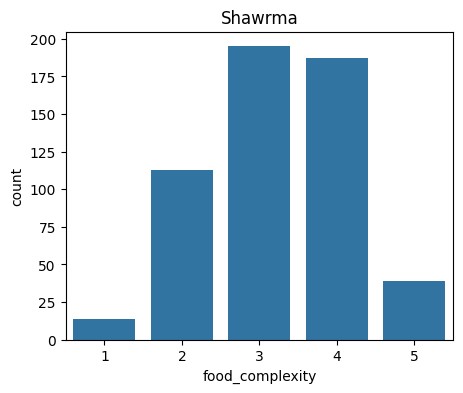

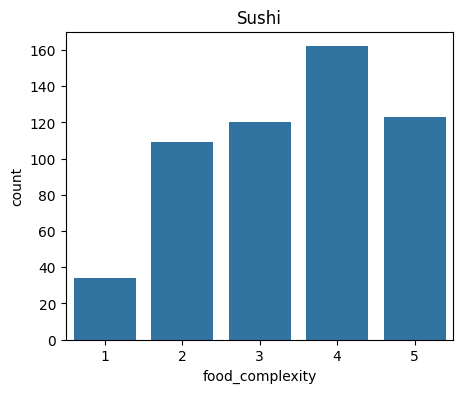

In [34]:
# Create histrogram of food complexity for each label
# First plot
plt.figure(figsize=(5, 4))
sns.countplot(df_pizza, x='food_complexity')
plt.title('Pizza')
plt.show()

# Second plot
plt.figure(figsize=(5, 4))
sns.countplot(df_shawrma, x='food_complexity')
plt.title('Shawrma')
plt.show()

# Third plot
plt.figure(figsize=(5, 4))
sns.countplot(df_sushi, x='food_complexity')
plt.title('Sushi')
plt.show()

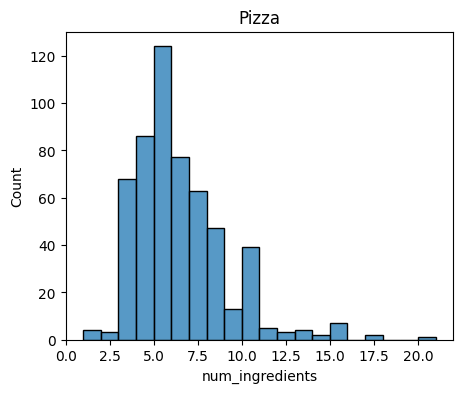

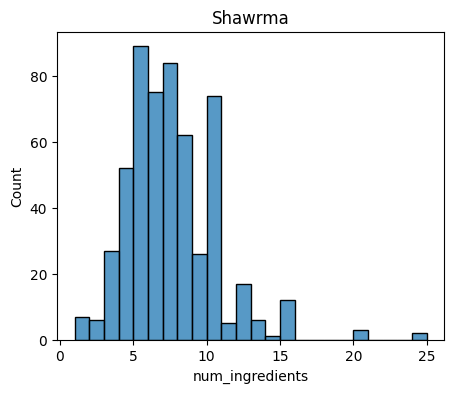

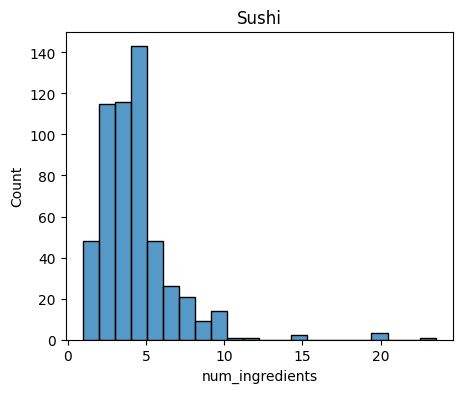

In [35]:
# Create histograms of number of ingredients for each food
# First plot
plt.figure(figsize=(5, 4))
sns.histplot(df_pizza, x='num_ingredients', binwidth=1)
plt.title('Pizza')
plt.show()

# Second plot
plt.figure(figsize=(5, 4))
sns.histplot(df_shawrma, x='num_ingredients', binwidth=1)
plt.title('Shawrma')
plt.show()

# Third plot
plt.figure(figsize=(5, 4))
sns.histplot(df_sushi, x='num_ingredients', binwidth=1)
plt.title('Sushi')
plt.show()

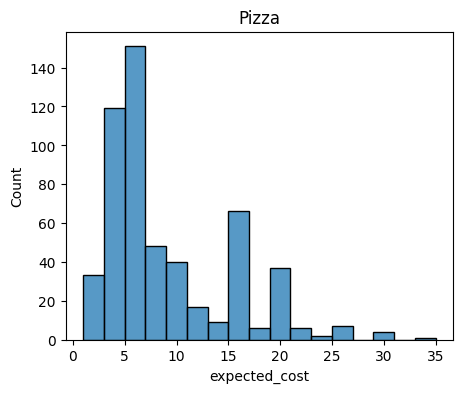

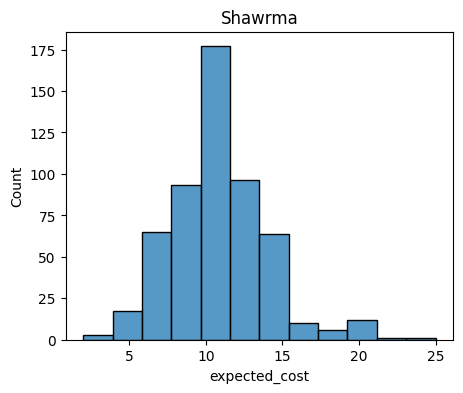

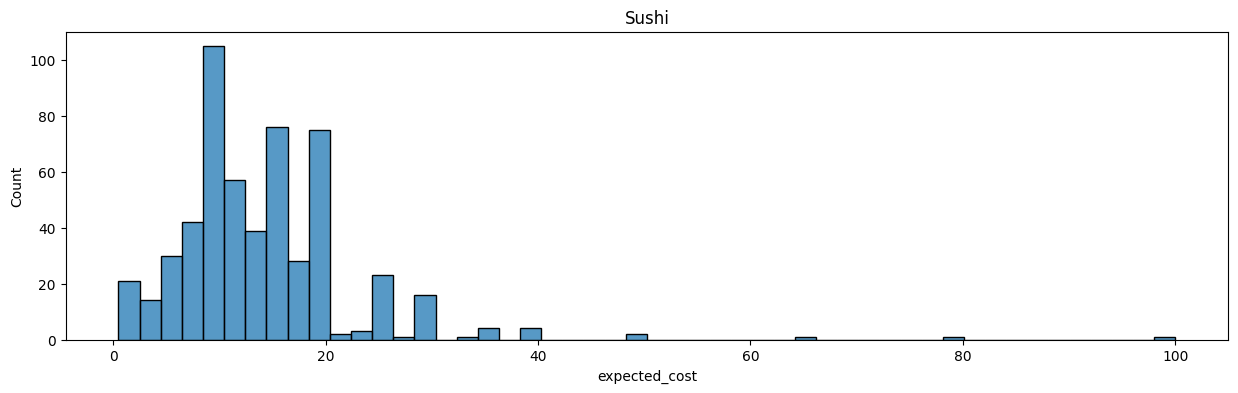

In [36]:
# Create histograms of number of ingredients for each food
# First plot
plt.figure(figsize=(5, 4))
sns.histplot(df_pizza, x='expected_cost', binwidth=2)
plt.title('Pizza')
plt.show()

# Second plot
plt.figure(figsize=(5, 4))
sns.histplot(df_shawrma, x='expected_cost', binwidth=2)
plt.title('Shawrma')
plt.show()

# Third plot
plt.figure(figsize=(15, 4))
sns.histplot(df_sushi, x='expected_cost', binwidth=2)
plt.title('Sushi')
plt.show()

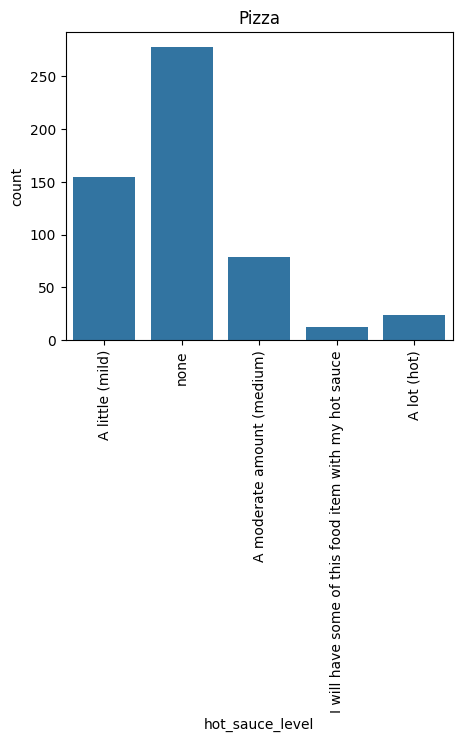

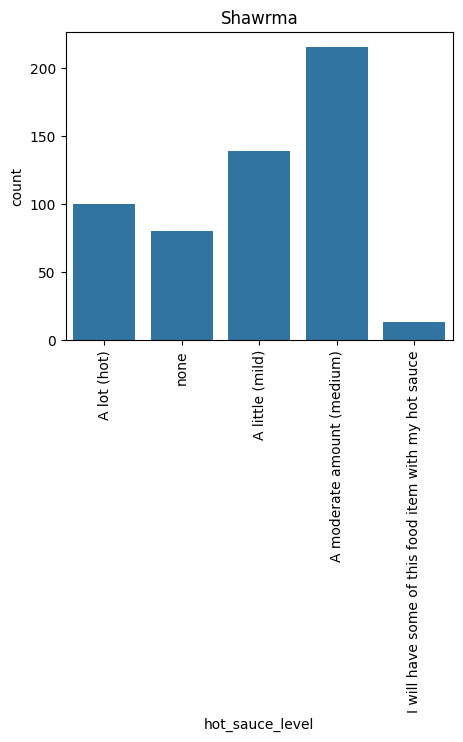

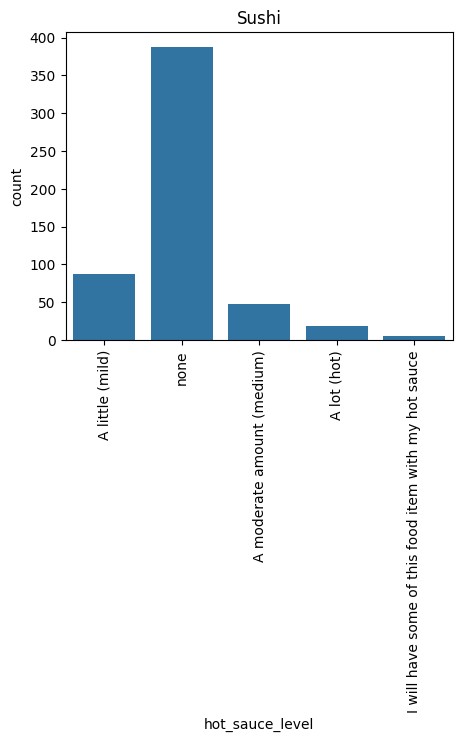

In [37]:
# Create bar plots for hot sauce level
# First plot
plt.figure(figsize=(5, 4))
sns.countplot(df_pizza, x='hot_sauce_level')
plt.xticks(rotation=90)
plt.title('Pizza')
plt.show()

# Second plot
plt.figure(figsize=(5, 4))
sns.countplot(df_shawrma, x='hot_sauce_level')
plt.xticks(rotation=90)
plt.title('Shawrma')
plt.show()

# Third plot
plt.figure(figsize=(5, 4))
sns.countplot(df_sushi, x='hot_sauce_level')
plt.xticks(rotation=90)
plt.title('Sushi')
plt.show()

In [38]:
# Top 5 common drinks for each food type

# Pizza
display(df_pizza['paired_drink'].value_counts().head(10))

# Shawrma
display(df_shawrma['paired_drink'].value_counts().head(10))

# Sushi
display(df_sushi['paired_drink'].value_counts().head(10))

,count
paired_drink,
coke,153
soda,71
cola,51
water,40
pepsi,37
diet coke,27
coca-cola,26
sprite,25
pop,22


,count
paired_drink,
water,141
coke,76
soda,37
juice,32
sprite,29
none,29
pepsi,26
cola,22
iced tea,22


,count
paired_drink,
water,206
tea,110
none,51
sake,43
green tea,42
coke,13
juice,11
beer,10
cola,9


In [39]:
# Top 10 common related movies for each food type

# Pizza
display(df_pizza['related_movie'].value_counts().head(10))

# Shawrma
display(df_shawrma['related_movie'].value_counts().head(10))

# Sushi
display(df_sushi['related_movie'].value_counts().head(10))

,count
related_movie,
Teenage Mutant Ninja Turtles,62
Home Alone,56
Ratatouille,36
Cloudy with a Chance of Meatballs,26
Spider-Man 2,23
Spider-Man,17
The Godfather,13
Your Friendly Neighborhood Spider-Man,10
The Garfield Movie,8


,count
related_movie,
The Avengers,145
Avengers: Doomsday,86
The Dictator,17
Aladdin,17
none,11
Ratatouille,7
Borat,7
Deadpool & Wolverine,7
the avengers,6


,count
related_movie,
Jiro Dreams of Sushi,33
Spirited Away,24
"Monsters, Inc.",20
Finding Nemo,19
Your Name.,16
Kill Bill: Vol. 1,14
The Fast and the Furious: Tokyo Drift,14
Rush Hour,13
Kung Fu Panda,11


In [40]:
# Get summary table of serving setting for each food type

serving_setting_summary = {'Serving Setting': ['Weekday Lunch', 'Weekday Dinner', 'Weekend Lunch', 'Weekend Dinner', 'Party', 'Night Snack'],
                           'Pizza': [df_pizza['serving_setting.weekday_lunch'].sum(), df_pizza['serving_setting.weekday_dinner'].sum(),
                                     df_pizza['serving_setting.weekend_lunch'].sum(), df_pizza['serving_setting.weekend_dinner'].sum(),
                                     df_pizza['serving_setting.party'].sum(), df_pizza['serving_setting.night_snack'].sum()],
                           'Shawrma': [df_shawrma['serving_setting.weekday_lunch'].sum(), df_shawrma['serving_setting.weekday_dinner'].sum(),
                                     df_shawrma['serving_setting.weekend_lunch'].sum(), df_shawrma['serving_setting.weekend_dinner'].sum(),
                                     df_shawrma['serving_setting.party'].sum(), df_shawrma['serving_setting.night_snack'].sum()],
                           'Sushi': [df_sushi['serving_setting.weekday_lunch'].sum(), df_sushi['serving_setting.weekday_dinner'].sum(),
                                     df_sushi['serving_setting.weekend_lunch'].sum(), df_sushi['serving_setting.weekend_dinner'].sum(),
                                     df_sushi['serving_setting.party'].sum(), df_sushi['serving_setting.night_snack'].sum()]}

serving_setting_summary_df = pd.DataFrame(serving_setting_summary)
serving_setting_summary_df = serving_setting_summary_df.set_index('Serving Setting')
serving_setting_summary_df

,Pizza,Shawrma,Sushi
Serving Setting,,,
Weekday Lunch,409.0,507.0,313.0
Weekday Dinner,359.0,317.0,382.0
Weekend Lunch,378.0,389.0,345.0
Weekend Dinner,390.0,236.0,457.0
Party,521.0,89.0,222.0
Night Snack,339.0,178.0,130.0


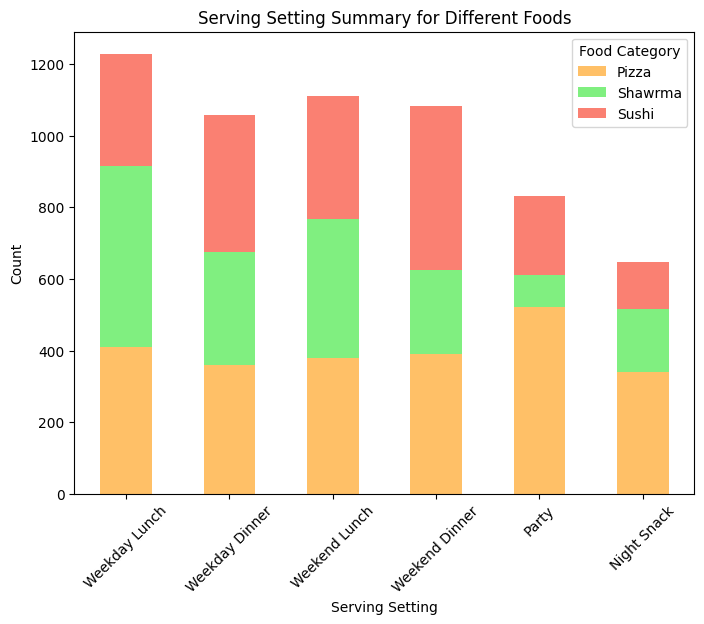

In [41]:
# Create the stacked bar plot
custom_colors = ['#FFC067', '#80EF80', '#FA8072']
serving_setting_summary_df.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

# Add labels and title
plt.xlabel('Serving Setting')
plt.ylabel('Count')
plt.title('Serving Setting Summary for Different Foods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Food Category')

# Show the plot
plt.show()

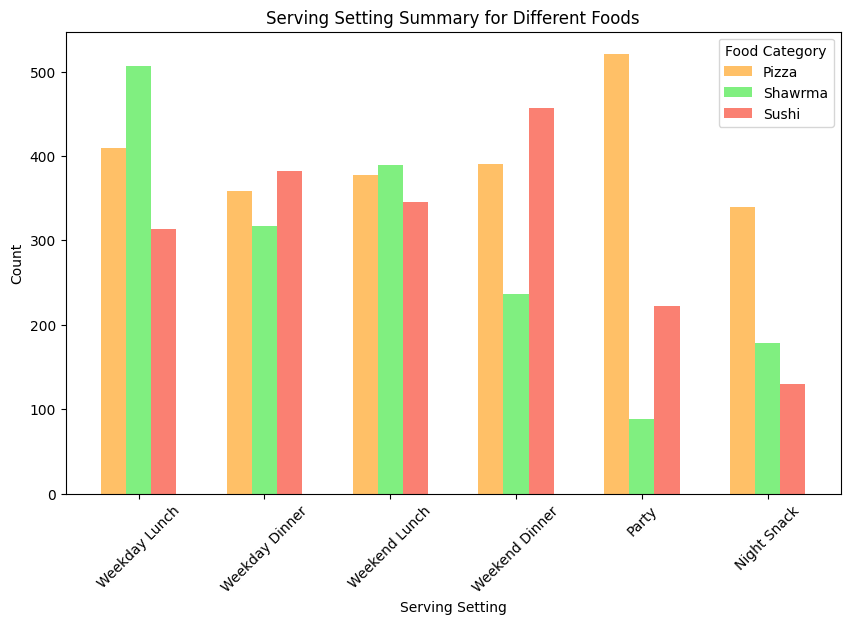

In [42]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Number of categories
categories = serving_setting_summary_df.index
x = np.arange(len(categories))  # X-axis positions for each serving setting
width = 0.2  # Width of each bar

# Plot each food category side by side
ax.bar(x - width, serving_setting_summary_df['Pizza'], width=width, label='Pizza', color='#FFC067')
ax.bar(x, serving_setting_summary_df['Shawrma'], width=width, label='Shawrma', color='#80EF80')
ax.bar(x + width, serving_setting_summary_df['Sushi'], width=width, label='Sushi', color='#FA8072')

# Formatting
ax.set_xlabel('Serving Setting')
ax.set_ylabel('Count')
ax.set_title('Serving Setting Summary for Different Foods')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)  # Rotate x-axis labels for readability
ax.legend(title='Food Category')

# Show the plot
plt.show()

In [43]:
# Get summary table of serving setting for assoiated people

associated_people_summary = {'Associated People': associated_peoples,
                           'Pizza': [df_pizza['associated_people.parents'].sum(), df_pizza['associated_people.siblings'].sum(),
                                     df_pizza['associated_people.friends'].sum(), df_pizza['associated_people.stangers'].sum(),
                                     df_pizza['associated_people.teachers'].sum()],
                           'Shawrma': [df_shawrma['associated_people.parents'].sum(), df_shawrma['associated_people.siblings'].sum(),
                                     df_shawrma['associated_people.friends'].sum(), df_shawrma['associated_people.stangers'].sum(),
                                     df_shawrma['associated_people.teachers'].sum()],
                           'Sushi': [df_sushi['associated_people.parents'].sum(), df_sushi['associated_people.siblings'].sum(),
                                     df_sushi['associated_people.friends'].sum(), df_sushi['associated_people.stangers'].sum(),
                                     df_sushi['associated_people.teachers'].sum()]}

associated_people_summary_df = pd.DataFrame(associated_people_summary)
associated_people_summary_df = associated_people_summary_df.set_index('Associated People')
associated_people_summary_df

,Pizza,Shawrma,Sushi
Associated People,,,
Parents,170.0,138.0,280.0
Siblings,212.0,142.0,211.0
Friends,485.0,382.0,387.0
Strangers,89.0,218.0,127.0
Teachers,158.0,25.0,29.0


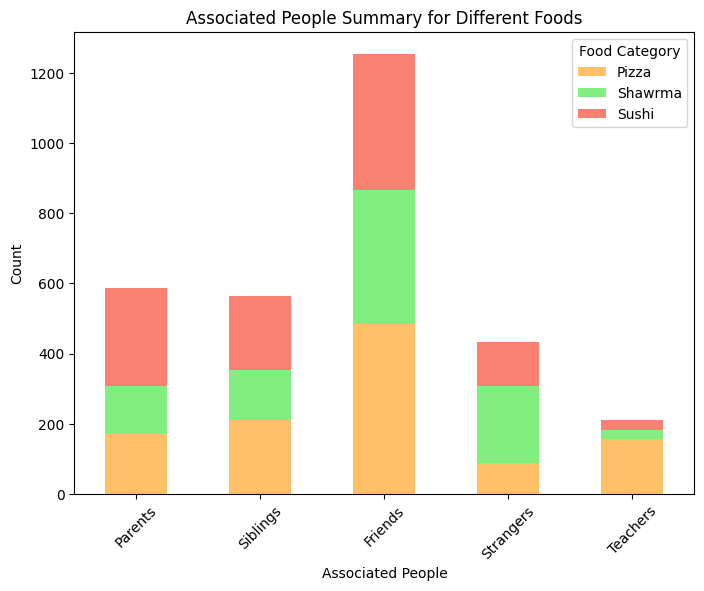

In [44]:
# Create the stacked bar plot
custom_colors = ['#FFC067', '#80EF80', '#FA8072']
associated_people_summary_df.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

# Add labels and title
plt.xlabel('Associated People')
plt.ylabel('Count')
plt.title('Associated People Summary for Different Foods')
plt.xticks(rotation=45)
plt.legend(title='Food Category')

# Show the plot
plt.show()

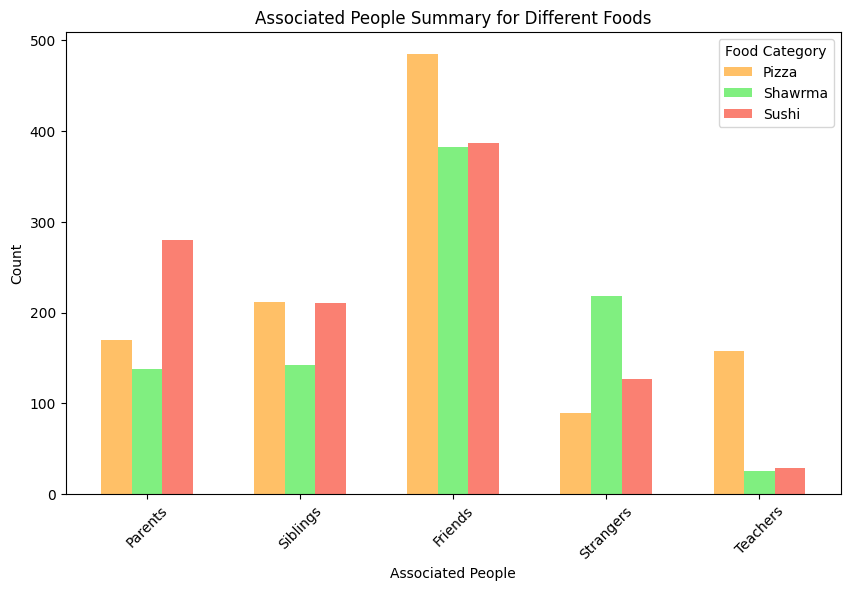

In [45]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Number of categories
categories = associated_people_summary_df.index
x = np.arange(len(categories))  # X-axis positions for each serving setting
width = 0.2  # Width of each bar

# Plot each food category side by side
ax.bar(x - width, associated_people_summary_df['Pizza'], width=width, label='Pizza', color='#FFC067')
ax.bar(x, associated_people_summary_df['Shawrma'], width=width, label='Shawrma', color='#80EF80')
ax.bar(x + width, associated_people_summary_df['Sushi'], width=width, label='Sushi', color='#FA8072')

# Formatting
ax.set_xlabel('Associated People')
ax.set_ylabel('Count')
ax.set_title('Associated People Summary for Different Foods')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)  # Rotate x-axis labels for readability
ax.legend(title='Food Category')

# Show the plot
plt.show()